In [2]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

####[sklearn gradient descent](http://scikit-learn.org/0.7/modules/generated/scikits.learn.linear_model.SGDRegressor.html#scikits.learn.linear_model.SGDRegressor)

####[sklearn preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

####[sklearn mean squared errror](http://scikit-learn.org/dev/modules/model_evaluation.html#mean-squared-error)

---
#Gradient Descent - Exercise
---

---
##Create some artificial data
---

In [3]:
#This code creates an artificial dataset of 100 points
m = 200

#Generate m points between 1000 and 3000 as input features x
x=np.array(np.linspace(1000,3000,m))

#Generate a little noise to add to x
z = np.random.rand(m)*100

#Now generate y - a straight line with added noise. The slope is theta1 (0.6) and the y intercept is theta0 (50)
theta0 = 50
theta1 = 0.6
y = [y*theta1 + theta0 for y in x] + z

---
##Perform the feature scaling
###Use a scaler so that you can scale new points for prediction
---

In [4]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
x_scaled =  scaler.transform(x)

---
##Plot the data
###Plot the unscaled data on one plot and the scaled data on another

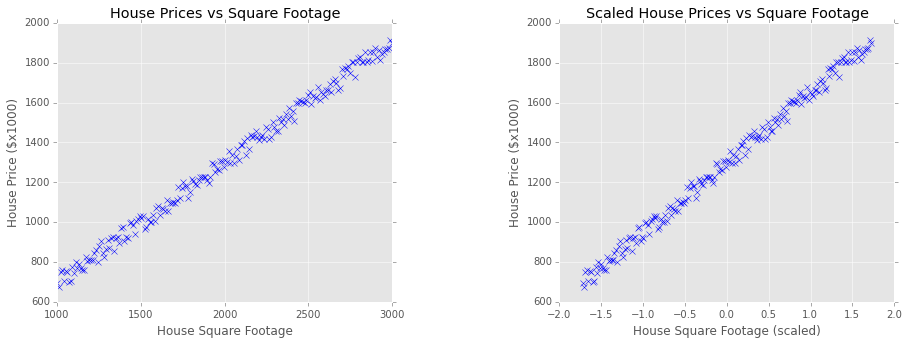

In [5]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,y, 'x', color='blue')
ax1.set_xlabel("House Square Footage")
ax1.set_ylabel("House Price ($x1000)")
ax1.set_title("House Prices vs Square Footage")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_scaled,y, 'x', color='blue')
ax2.set_xlabel("House Square Footage (scaled)")
ax2.set_ylabel("House Price ($x1000)")
ax2.set_title("Scaled House Prices vs Square Footage")
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

---
#Now use scikit-learn SGD - stochastic gradient descent
##Set the learning rate to $0.01$ initially
##Use 'squared_loss'
##Explicitely fit and intercept
##Shuffle the data and set the number of iterations to $10$ initially
##Using sklearn's mse print the mean squared error
---

In [29]:
#set the hyper-parameters of the model
clf = SGDRegressor(loss='squared_loss', eta0=0.01, fit_intercept=True, \
                   n_iter=10, shuffle=True)

#for using scikit learn you always need to get the input arrays into the correct 'shape'
x1 = x_scaled.reshape(m,1)

#fit the model
clf.fit(x1, y)

y_true = y
y_hat = clf.predict(x1)
print mean_squared_error(y_true, y_hat)

1364.46247173


---
##Now set up a loop to record the mse produced from different number-of-iterations
##Maybe try anything from 1 to 10000
##Plot the mse vs number-of-iterations on a graph
---

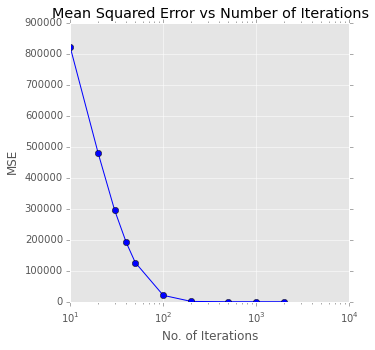

In [31]:
mse =[]
iters_list = [10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000]
for iters in iters_list:
    clf = SGDRegressor(loss='squared_loss', eta0=0.001, fit_intercept=True, n_iter=iters, shuffle=True, verbose=0)
    x1 = x_scaled.reshape(m,1)
    clf.fit(x1, y)
    y_true = y
    y_pred = clf.predict(x1)
    mse.append(mean_squared_error(y_true, y_pred))
    
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(iters_list, mse, marker='o', color='b')
ax.set_title("Mean Squared Error vs Number of Iterations")
ax.set_xlabel("No. of Iterations")
ax.set_ylabel("MSE")
ax.set_xscale("Log")
#ax.set_yscale("Log")
#ax.set_xlim(-1, iters_list[-1])
#ax.set_ylim(0, 1500)

---
##Using the training set plot the training set and the predicted line
---

[ 351.66369494]
[ 1302.15737499]


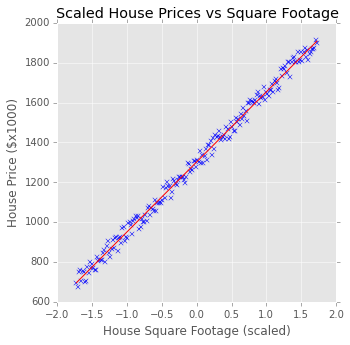

In [32]:
#plot the results
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("House Square Footage (scaled)")
ax.set_ylabel("House Price ($x1000)")
ax.set_title("Scaled House Prices vs Square Footage")
ax.scatter(x1, y, marker='x', color='b')
ax.plot(x1, clf.predict(x1), color='r')

#print out theta1 and theta0
print clf.coef_
print clf.intercept_

---
##Make some predictions
###How much should be paid for a house that is 2495 square feet?
---

In [33]:
x_new = [2495.0]
x_new_scaled = scaler.transform(x_new)
print clf.predict(x_new_scaled)

[ 1602.15780051]


---
##Finally, replot the training data, the predicted line, and the house price prediction
##Make sure your graph uses unscaled data
---

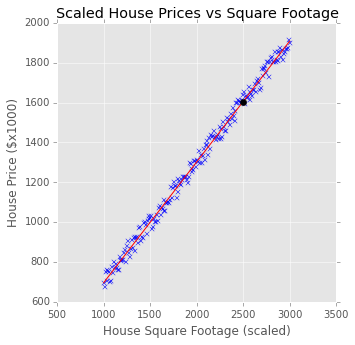

In [34]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("House Square Footage (scaled)")
ax.set_ylabel("House Price ($x1000)")
ax.set_title("Scaled House Prices vs Square Footage")
ax.scatter(x, y, marker='x', color='b')
ax.plot(x, clf.predict(x1), color='r')
ax.plot(x_new, clf.predict(x_new_scaled), 'ko')

---
##Have a look what happens when you start to crank up the number of points...depending on your laptop memory try 1000000 points.
##Play around with the learning rate
##Play around with the number of iterations
---